<hr>

# 📉 03 - DATA ANALYSIS 📉

<style>
h1 {
    text-align: center;
    color: RED;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<hr>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

## Load data

In [4]:

df = pd.read_csv('../data/processed/online_shoppers_intention_06_clean.csv')
df.head()


admin  admin_duration  info  info_duration  prod_related  \
0      0             0.0     0            0.0             1   
1      0             0.0     0            0.0             2   
2      0             0.0     0            0.0             1   
3      0             0.0     0            0.0             2   
4      0             0.0     0            0.0            10   

   prod_related_duration  bounce_rate  exit_rate  page_value  special_day  \
0               0.000000         0.20       0.20         0.0          0.0   
1              64.000000         0.00       0.10         0.0          0.0   
2               0.000000         0.20       0.20         0.0          0.0   
3               2.666667         0.05       0.14         0.0          0.0   
4             627.500000         0.02       0.05         0.0          0.0   

  month  os  browser  region  traffic_type       visitor_type  weekend  \
0   Feb   1        1       1             1  Returning_Visitor    False   
1   Feb   2        2       1             2  Returning_Visitor    False   
2   Feb   4        1       9             3  Returning_Visitor    False   
3   Feb   3        2       2             4  Returning_Visitor    False   
4   Feb   3        3       1             4  Returning_Visitor     True   

   revenue  
0    False  
1    False  
2    False  
3    False  
4    False

In [5]:
df.describe().round(2)

admin  admin_duration      info  info_duration  prod_related  \
count  12330.00        12330.00  12330.00       12330.00      12330.00   
mean       2.32           80.82      0.50          34.47         31.73   
std        3.32          176.78      1.27         140.75         44.48   
min        0.00            0.00      0.00           0.00          0.00   
25%        0.00            0.00      0.00           0.00          7.00   
50%        1.00            7.50      0.00           0.00         18.00   
75%        4.00           93.26      0.00           0.00         38.00   
max       27.00         3398.75     24.00        2549.38        705.00   

       prod_related_duration  bounce_rate  exit_rate  page_value  special_day  \
count               12330.00     12330.00   12330.00    12330.00     12330.00   
mean                 1194.75         0.02       0.04        5.89         0.06   
std                  1913.67         0.05       0.05       18.57         0.20   
min                     0.00         0.00       0.00        0.00         0.00   
25%                   184.14         0.00       0.01        0.00         0.00   
50%                   598.94         0.00       0.03        0.00         0.00   
75%                  1464.16         0.02       0.05        0.00         0.00   
max                 63973.52         0.20       0.20      361.76         1.00   

             os   browser    region  traffic_type  
count  12330.00  12330.00  12330.00      12330.00  
mean       2.12      2.36      3.15          4.07  
std        0.91      1.72      2.40          4.03  
min        1.00      1.00      1.00          1.00  
25%        2.00      2.00      1.00          2.00  
50%        2.00      2.00      3.00          2.00  
75%        3.00      2.00      4.00          4.00  
max        8.00     13.00      9.00         20.00

## Univariate analysis

In [6]:
numeric_df = df.select_dtypes(include=[np.number])
categorical_df = df.select_dtypes(exclude=[np.number])

In [7]:
for col in categorical_df.columns:
    
    fig = px.histogram(df[col])
    fig.show()

In [8]:
for col in numeric_df.columns:
    fig = px.histogram(df[col])
    fig.show()

## Bivariate analysis

Correlation - the strength and direction of the relationship between two continuous variables.

In [9]:
df.select_dtypes('number').corr().style.background_gradient()

In [11]:
fig = plt.figure(figsize=(12, 12))
sns.heatmap(numeric_df.corr(), annot=True, cmap='RdBu')

<Axes: >

<Axes: >

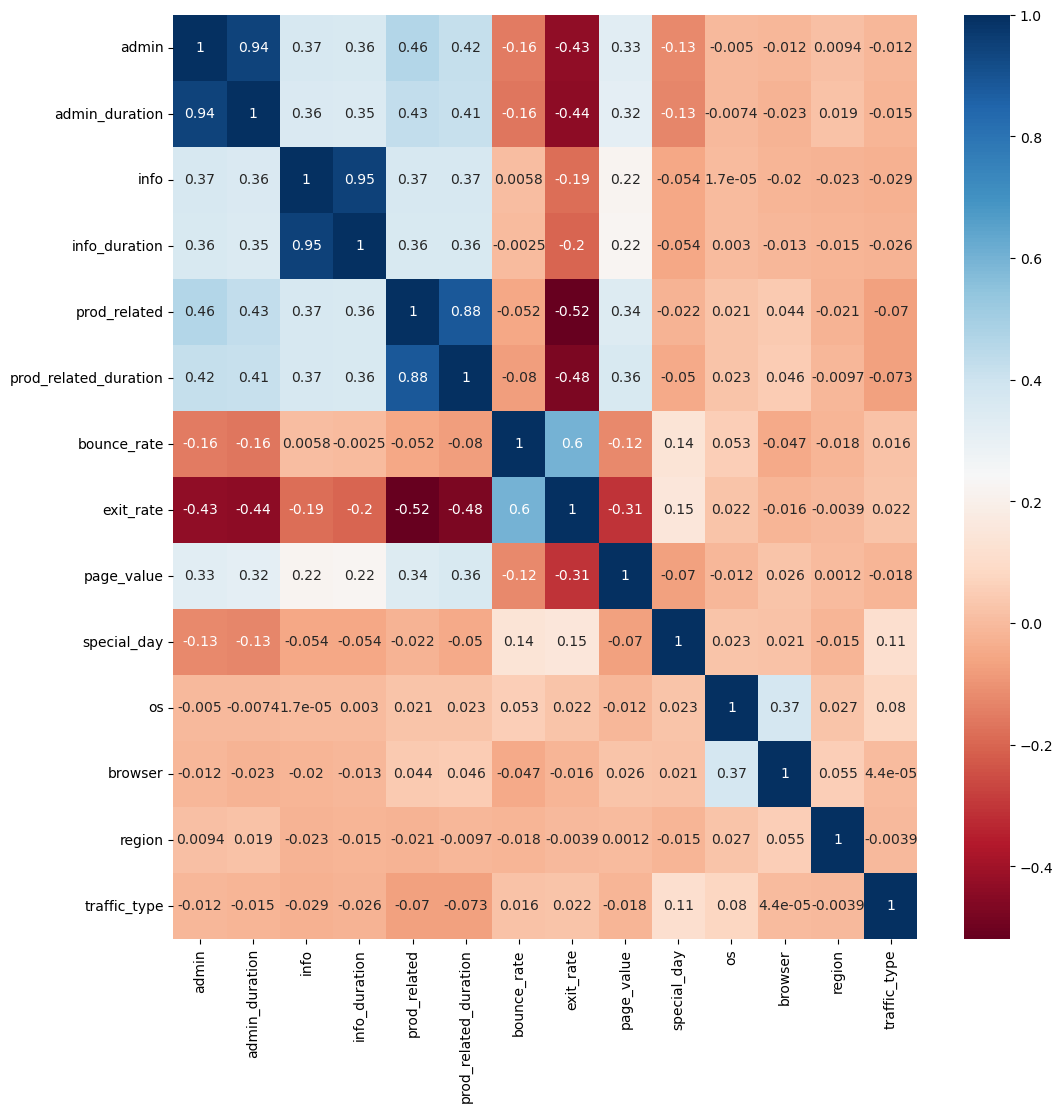

In [12]:
fig = plt.figure(figsize=(12, 12))
sns.heatmap(numeric_df.corr(method='spearman'), annot=True, cmap='RdBu')

In [14]:
# Convert boolean columns to integer before calculating the correlation matrix
df['revenue'] = df['revenue'].astype(int)

# Select numerical columns for correlation analysis
numerical_features = ['admin', 'admin_duration', 'info', 'info_duration', 'prod_related', 
                      'prod_related_duration', 'bounce_rate', 'exit_rate', 'page_value', 
                      'special_day']

# Calculate the correlation matrix
correlation_matrix = df[numerical_features + ['revenue']].corr()

# Plot the heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features and Revenue')
plt.show()

In [23]:
# Group the data by 'Month' and 'Revenue' to get the count of purchases
df['revenue'] = df['revenue'].astype(bool)

month_revenue_count = df.groupby(['month', 'revenue']).size().reset_index(name='count')

# Create the bar plot
fig = px.bar(month_revenue_count, x='month', y='count', color='revenue', 
             title='Month vs. Revenue', 
             labels={'month': 'Month', 'revenue': 'Purchase Made'})
fig.show()

In [25]:
import plotly.express as px
import plotly.subplots as sp
from plotly.graph_objs import Bar

# Filter the data for True (purchases) and False (no purchases)
df_true = month_revenue_count[month_revenue_count['revenue'] == True]
df_false = month_revenue_count[month_revenue_count['revenue'] == False]

# Create subplots: two bar plots, one for True and one for False
fig = sp.make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1)

# Plot for True
fig.add_trace(
    Bar(x=df_true['month'], y=df_true['count'], name='True', marker_color='red'),
    row=1, col=1
)

# Plot for False
fig.add_trace(
    Bar(x=df_false['month'], y=df_false['count'], name='False', marker_color='blue'),
    row=2, col=1
)

# Get the maximum y value from both plots to ensure same scale
max_y = max(df_true['count'].max(), df_false['count'].max())

# Update layout to have same y-axis range for both subplots
fig.update_layout(
    title_text="Month vs. Revenue (True and False Separately)",
    showlegend=True,
    xaxis_title='Month',
    yaxis_title='Count',
    yaxis=dict(range=[0, max_y]),  # Set the same scale for the first plot
    yaxis2=dict(range=[0, max_y]), # Set the same scale for the second plot
)

fig.show()

In [ ]:
# Group the data by 'VisitorType' and 'Revenue' to get the count of purchases
visitor_revenue_count = df.groupby(['visitor_type', 'revenue']).size().reset_index(name='count')

# Create the bar chart for True and False revenue separately
fig = px.bar(visitor_revenue_count, x='visitor_type', y='count', color='revenue',
             barmode='group', title="VisitorType vs. Revenue",
             labels={'visitor_type': 'Visitor Type', 'count': 'Count', 'revenue': 'Purchase Made'})

# Show the plot
fig.show()

In [36]:
# Map the 'weekend' boolean values to 'Weekend' and 'Weekday'
df['weekend_label'] = df['weekend'].map({True: 'Weekend', False: 'Weekday'})

# Group the data by 'weekend_label' and 'revenue' to get the count of purchases
weekend_revenue_count = df.groupby(['weekend_label', 'revenue']).size().reset_index(name='count')

# Create the bar chart for Weekend vs Revenue
fig = px.bar(weekend_revenue_count, x='weekend_label', y='count', color='revenue', 
             title='Weekend vs. Revenue', 
             labels={'weekend_label': 'Weekend/Weekday', 'count': 'Count', 'revenue': 'Purchase Made'})

fig.show()

In [53]:
df.head()

admin  admin_duration  info  info_duration  prod_related  \
0      0             0.0     0            0.0             1   
1      0             0.0     0            0.0             2   
2      0             0.0     0            0.0             1   
3      0             0.0     0            0.0             2   
4      0             0.0     0            0.0            10   

   prod_related_duration  bounce_rate  exit_rate  page_value  special_day  \
0               0.000000         0.20       0.20         0.0          0.0   
1              64.000000         0.00       0.10         0.0          0.0   
2               0.000000         0.20       0.20         0.0          0.0   
3               2.666667         0.05       0.14         0.0          0.0   
4             627.500000         0.02       0.05         0.0          0.0   

  month  os  browser  region  traffic_type       visitor_type  weekend  \
0   Feb   1        1       1             1  Returning_Visitor    False   
1   Feb   2        2       1             2  Returning_Visitor    False   
2   Feb   4        1       9             3  Returning_Visitor    False   
3   Feb   3        2       2             4  Returning_Visitor    False   
4   Feb   3        3       1             4  Returning_Visitor     True   

   revenue weekend_label  
0    False       Weekday  
1    False       Weekday  
2    False       Weekday  
3    False       Weekday  
4    False       Weekend

In [57]:
# List of 5 columns you want to visualize in the scatter matrix
selected_columns = ['prod_related', 'bounce_rate', 'exit_rate', 'page_value', 'os']

# Create the scatter matrix with the selected columns and color by 'revenue'
fig = px.scatter_matrix(df,
                        dimensions=selected_columns,
                        color='revenue',
                        title="Scatter Matrix for Selected Features vs Revenue")

# Update the layout for better sizing
fig.update_layout(height=1000, width=1000)

# Show the plot
fig.show()